<a href="https://colab.research.google.com/github/AlexMa123/Computational-physics-2022/blob/main/notebook/Lecture4%20-%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to network

## Review

Network theory is the study of graphs as a representation of either symmetric relations or asymmetric relations between discrete objects. Complex systems network theory provides techniques for analyzing structure in a system of interacting agents, represented as a network.

A network, or graph, includes two components: Nodes and Links (or Vertices and Edges). Most complex systems are graph-like. For example friendship networks, scientific collaboration networks, Genetic interaction networks, Protein-Protein interaction networks, transportation networks, electric networks, and so on.

In python, there are several packages are designed for network (or graph) theory. Networkx might be the most famous one, however, it's too slow to analyze large-scale networks. In this tutorial, I choose igraph, which is written in C, as our tool for analyzing networks.

In [2]:
# install igraph package
!apt install libcairo2-dev
!pip install pycairo
!pip install python-igraph

Unable to locate an executable at "/Library/Java/JavaVirtualMachines/jdk-19.jdk/Contents/Home/bin/apt" (-1)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.6/344.6 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pycairo (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-10.9-x86_64-cpython-39
      creating build/lib.macosx-10.9-x86_64-cpython-39/cairo
      copying cairo/__init__.py -> build/lib.macosx-10.9-x86_64-cpython-39/cairo
      copying cairo/__init__.pyi -> build/lib.macosx-10.9-x86_64-cpython-39/cairo
      copying cairo/py.typed -> build/lib.macosx-10.9-x86_64-cpython-39/cairo
      running buil

In [27]:
import igraph as ig
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

### Create a graph from scratch

#### Undirected Graph

In [35]:
G = ig.Graph(n=5) # Create a graph with 5 vertices, by default, directed=False
G.add_edges(
    [(2, 3), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4)]
) # Add edges to the graph
G.vs['label'] = ['A', 'B', 'C', 'D', 'E'] # set labels for each vertices
print(G)

IGRAPH U--- 5 6 --
+ attr: label (v)
+ edges:
2--3 0--1 0--2 0--3 0--4 1--4


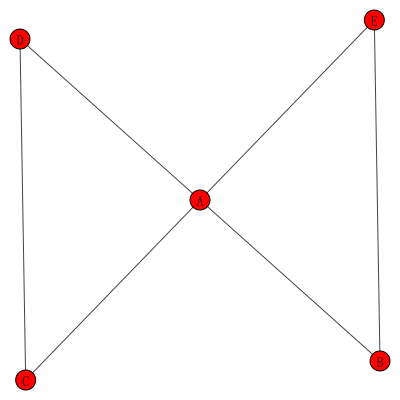

In [36]:
ig.plot(G, 
        bbox=(400, 400),)

In [37]:
G.add_vertices(2) # Add another 2 vertices
G.add_edges([
    (5, 6), (5, 0)
])
G.vs[-2:]['label'] = ['F', 'G']

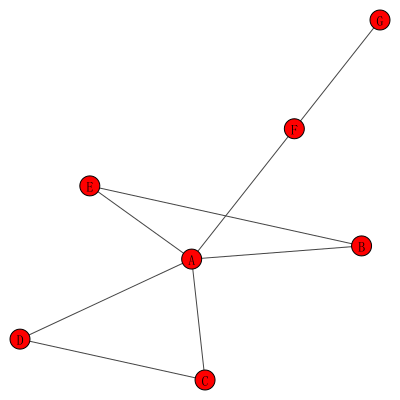

In [38]:
ig.plot(G, 
        bbox=(400, 400),)

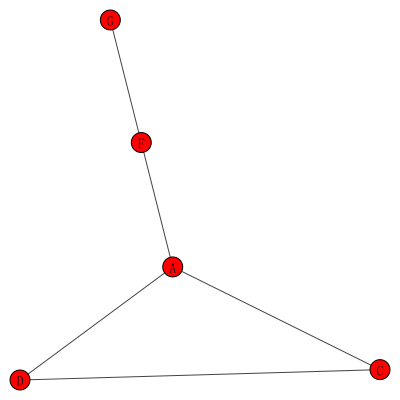

In [39]:
G.delete_vertices([4, 1]) # remove vertices by id
ig.plot(G, 
        bbox=(400, 400),)

In [45]:
G.vs[3]

igraph.Vertex(<igraph.Graph object at 0x000001FE1258F940>, 3, {'label': 'F'})

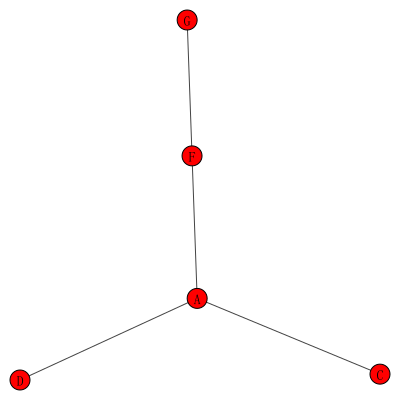

In [40]:
eid = G.get_eid(G.vs.find(label='D'), G.vs.find(label_eq='C'))
G.delete_edges([eid]) # remove the edge connect C and D
ig.plot(G, 
        bbox=(400, 400),)

#### Directed Graph

In [46]:
G = ig.Graph(n=5, directed=True) # Create a graph with 5 vertexes
G.add_edges(
    [(2, 3), (1, 0), (0, 3), (0, 4), (1, 4), (4, 1), (0, 2)]
)

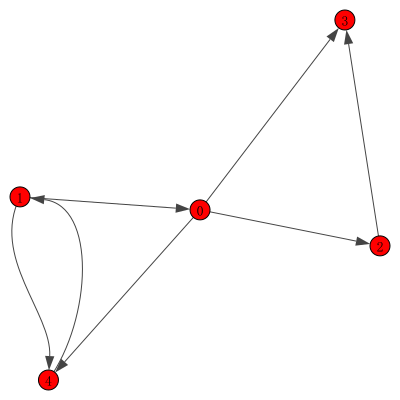

In [47]:
ig.plot(G, 
        bbox=(400, 400),
        vertex_label=[0, 1, 2, 3, 4])

#### Weighted Graph


In [10]:
G = ig.Graph(n=5, directed=True) # Create a graph with 5 vertexes
G.add_edges(
    [(2, 3), (1, 0), (0, 3), (0, 4), (1, 4), (4, 1), (0, 2)]
)

G.es['weight'] = np.random.rand(len(G.es))
print(G)

IGRAPH D-W- 5 7 --
+ attr: weight (e)
+ edges:
2->3 1->0 0->3 0->4 1->4 4->1 0->2


In [11]:
G.is_weighted()

True

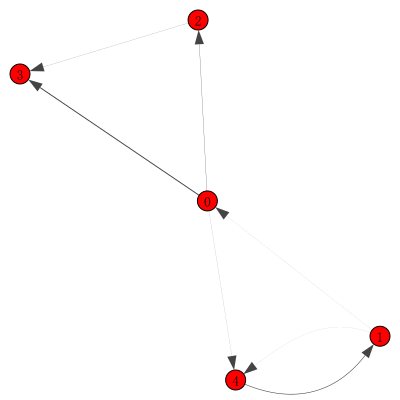

In [12]:
ig.plot(G, 
        bbox=(400, 400),
        vertex_label=[0, 1, 2, 3, 4],
        edge_width=G.es['weight'])

### Matrix representation of a Graph

#### Adjacency matrix
  An adjacency matrix is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph. If the graph is undirected, the adjacency matrix is symmetric

  The matrix element $A_{ij}$ is one when there is an edge from vertex $v_i$ to vertex $v_j$

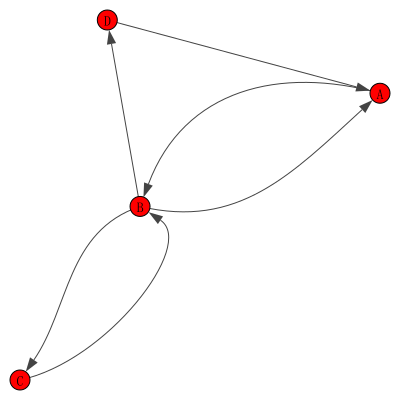

In [58]:
A = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 1],
    [0, 1, 0, 0],
    [1, 0, 0, 0]
]) # A is asymmetric, G will be a directed graph
G = ig.Graph.Adjacency(A)
G.vs['value'] = [10, 20, 30, 40]
G.vs['name'] = ['A', 'B', 'C', 'D', 'E']
G.vs['label'] = G.vs['name']
ig.plot(G, 
        bbox=(400, 400),)

### Query vertices and edges

In [53]:
print(G)

IGRAPH DN-- 4 6 --
+ attr: label (v), name (v)
+ edges (vertex names):
A->B, B->A, B->C, B->D, C->B, D->A


In [59]:
G.vs[0]

igraph.Vertex(<igraph.Graph object at 0x000001FE1258F240>, 0, {'value': 10, 'name': 'A', 'label': 'A'})

In [15]:
print(G.vs[0:3]) # select by id

G.vs.find(name='A') # select by vertex's attribute
G.vs.select(name_in=['A', 'B']) # select vertices whose name is A or B
print(G.vs[0].neighbors()) # neighbors of vertex 0
print(G.vs[0].successors())
print(G.vs[0].predecessors())

[igraph.Vertex(<igraph.Graph object at 0x000001AE1F6D3D40>, 1, {'name': 'B', 'label': 'B'}), igraph.Vertex(<igraph.Graph object at 0x000001AE1F6D3D40>, 1, {'name': 'B', 'label': 'B'}), igraph.Vertex(<igraph.Graph object at 0x000001AE1F6D3D40>, 3, {'name': 'D', 'label': 'D'})]
[igraph.Vertex(<igraph.Graph object at 0x000001AE1F6D3D40>, 1, {'name': 'B', 'label': 'B'})]
[igraph.Vertex(<igraph.Graph object at 0x000001AE1F6D3D40>, 1, {'name': 'B', 'label': 'B'}), igraph.Vertex(<igraph.Graph object at 0x000001AE1F6D3D40>, 3, {'name': 'D', 'label': 'D'})]


In [60]:
G.es # select all the edges
print(G.get_eid(G.vs[0], G.vs[1])) # the edge id connect vertex 0 to vertex 1
print(G.es[0]) # select edge by id
e = G.es[0]
print(e.source, e.target) # source and target of an edge

0
igraph.Edge(<igraph.Graph object at 0x000001FE1258F240>, 0, {})
0 1


### Structural properties of graphs

#### Degree
The vertex degree is the number of edges adjacent to the node

In [17]:
print(G.degree())
print(G.vs[2].degree()) # vertex 2's degree
# for directed graph
print(G.indegree())
print(G.outdegree())

[3, 5, 2, 2]
2
[2, 2, 1, 1]
[1, 3, 1, 1]


#### shortest path

In [19]:
print(G.distances(source=G.vs[0], target=G.vs[2])) # get the shortest distance from 0 to 2
print(G.get_shortest_paths(G.vs[0],to=G.vs[2])) # get one of the shortest path from 0 to 2
print(G.get_all_shortest_paths(G.vs[0], G.vs[2])) # get all of the shortest path from 0 to 2
print(G.average_path_length()) # average of all of the shortest path

[[2]]
[[0, 1, 2]]
[[0, 1, 2]]
1.5833333333333333


#### diameter
The diameter of a graph is the length of the longest shortest path

In [20]:
print(G.diameter())
print(G.get_diameter())

3
[3, 0, 1, 2]


#### betweenness
The betweenness centrality of a node $v$ is given by the expression:
$$g(v)=\sum _{{s\neq v\neq t}}{\frac  {\sigma _{{st}}(v)}{\sigma _{{st}}}}$$

where $\sigma_{st}$ is the total number of shortest paths from node $s$ to node $t$ and $\sigma_{st}(v)$ is the number of those paths that pass through $v$ (not where $v$ is an end point).

In [21]:
print(G.vs.betweenness())
print(G.es.edge_betweenness())

[2.0, 5.0, 0.0, 0.0]
[5.0, 2.0, 3.0, 3.0, 3.0, 3.0]


#### Clustering coefficient (transitivity)
the transitivity of one vertex is given by:
$$
C = \frac{\text{Number of links among the k neighbors}}{k(k-1)/2}
$$

In [61]:
G = ig.Graph(n=5) # Create a graph with 5 vertices, by default, directed=False
G.add_edges(
    [(2, 3), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4)]
)

In [ ]:
4 * 3 / 2 = 6
2 / 6 = 1 / 3 = 0.33333

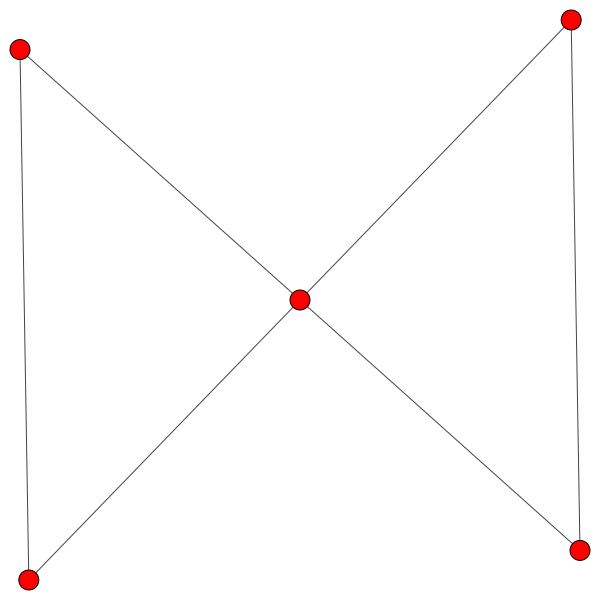

In [62]:
ig.plot(G)

In [24]:
print(G.transitivity_local_undirected()) # transitivity for each nodes
print(G.transitivity_undirected()) # global transitivity, the ratio of the triangles and connected triplets in the graph.
print(G.transitivity_avglocal_undirected())

[0.3333333333333333, 1.0, 1.0, 1.0, 1.0]
0.6
0.8666666666666666


### Generate Graph from build-in Generators

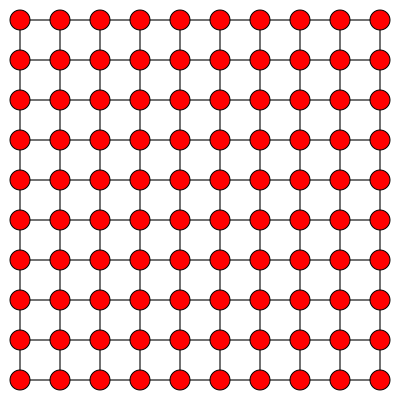

In [25]:
# Lattice
G = ig.Graph.Lattice([10, 10]) # Lattice size
layout = ig.Graph.layout_grid(G)
ig.plot(G, bbox=(400, 400), layout=layout)

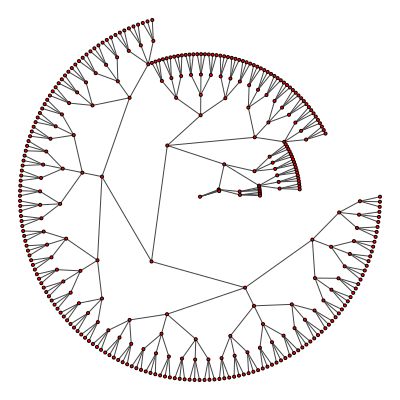

In [65]:
G = ig.Graph.Tree(n=364, children=3) # number of nodes, number of children per node
layout = ig.Graph.layout_reingold_tilford_circular(G)
ig.plot(G, vertex_size=3, bbox=(400, 400), layout=layout)

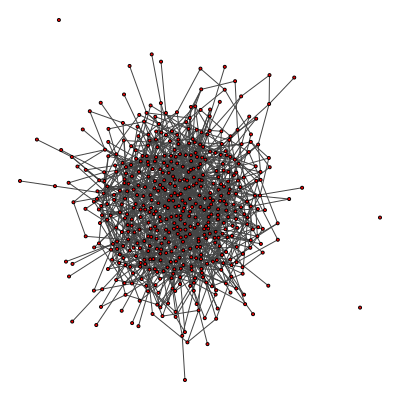

In [68]:
G = ig.Graph.Erdos_Renyi(500, p = 0.01) 
# number of nodes, p: probability or m: number of links, 
layout = ig.Graph.layout_auto(G)
ig.plot(G, bbox=(400, 400), vertex_size=3)

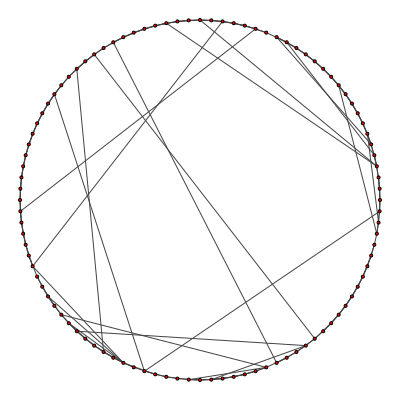

In [72]:
G = ig.Graph.Watts_Strogatz(1, 100, 2, 0.05) 
# dimension of the starting lattice, 
# number of nodes,
# the neighborhood within which the nodes of the lattice will be connected.
# rewiring probability
layout = ig.Graph.layout_circle(G)
ig.plot(G, bbox=(400, 400), vertex_size=3, layout=layout)

In [75]:
G = ig.Graph.Watts_Strogatz(1, 1000, 2, 0.1)
print("average length is ", G.average_path_length())
print("Clustering coefficient is", G.transitivity_undirected()) # for random network, C = p

average length is  7.028806806806807
Clustering coefficient is 0.25686059275521406


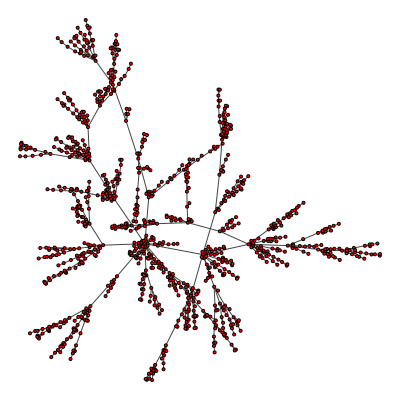

In [78]:
G = ig.Graph.Barabasi(1000, 1, power=1)
# number of nodes
# the number of edges to add in each time step
# The power of the preferential attachment
layout = ig.Graph.layout_auto(G)
ig.plot(G, bbox=(400, 400), vertex_size=3, layout=layout)

#### Degree distribution of Random graph and scale-free graph

##### Random Graph:

In [79]:
G_er = ig.Graph.Erdos_Renyi(1000, p = 0.01,)

In [80]:
def poisson_distribution(k, Lambda):
    from scipy.special import factorial
    return Lambda ** k * np.exp(- Lambda) / factorial(k)

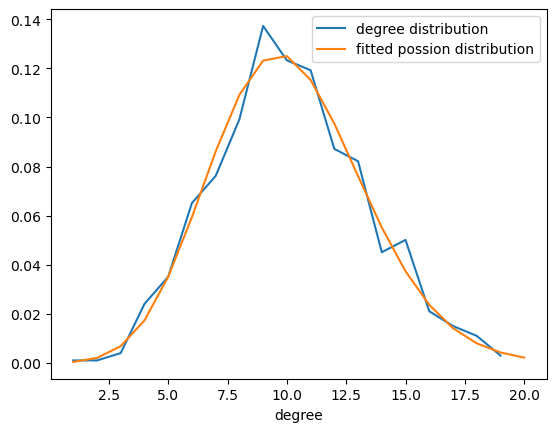

In [81]:
max_degree = G_er.vs.maxdegree()
x = np.arange(1, max_degree+1, 1)
y = poisson_distribution(x, np.mean(G_er.vs.degree()))
hist, bin = np.histogram(G_er.vs.degree(), bins=np.arange(0.5, max_degree+0.5, 1), density=True)
bin_center = (bin[1:] + bin[:-1]) / 2

plt.plot(bin_center, hist, label='degree distribution')
plt.plot(x, y, label='fitted possion distribution')
plt.legend()
plt.xlabel("degree")
plt.show()

scale free network

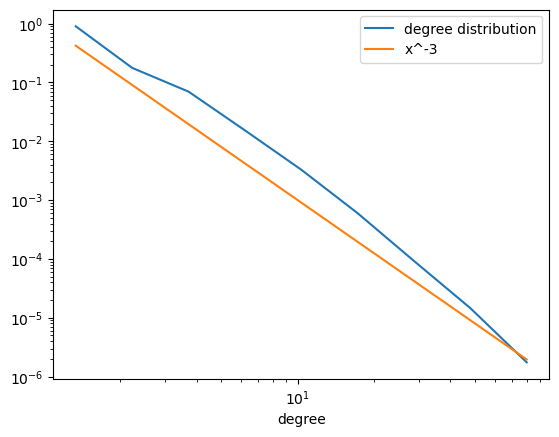

In [82]:
G_ba = ig.Graph.Barabasi(n=100000, m=1, power=1)
max_degree =  G_ba.maxdegree()
hist, bin = np.histogram(G_ba.vs.degree(), bins=np.arange(0.5, max_degree+0.5, 1), density=True)
hist, bin = np.histogram(G_ba.vs.degree(), bins=np.logspace(0, 2, 10), density=True)

bin_center = (bin[1:] + bin[:-1]) / 2
plt.plot(bin_center, hist, label='degree distribution')
plt.plot(bin_center, bin_center ** (-3), label='x^-3')
plt.xlabel('degree')
plt.legend()
plt.xscale('log')
plt.yscale('log')

### A real world network: 

In [48]:
# !wget https://github.com/ipython-books/cookbook-2nd-data/blob/master/routes.dat?raw=true -O airports.csv

--2022-12-27 14:22:45--  https://github.com/ipython-books/cookbook-2nd-data/blob/master/routes.dat?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ipython-books/cookbook-2nd-data/raw/master/routes.dat [following]
--2022-12-27 14:22:46--  https://github.com/ipython-books/cookbook-2nd-data/raw/master/routes.dat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ipython-books/cookbook-2nd-data/master/routes.dat [following]
--2022-12-27 14:22:47--  https://raw.githubusercontent.com/ipython-books/cookbook-2nd-data/master/routes.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443...

In [83]:
import pandas as pd
names = ('airline,airline_id,'
         'source,source_id,'
         'dest,dest_id,'
         'codeshare,stops,equipment').split(',')
routes = pd.read_csv(
    './airports.csv',
    names=names,
    header=None)
routes

,airline,airline_id,source,source_id,dest,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


In [84]:
routes.loc[:, ['source', 'dest']]

,source,dest
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB
...,...,...
67658,WYA,ADL
67659,DME,FRU
67660,FRU,DME
67661,FRU,OSS


In [85]:
G_airtraffic = ig.Graph.DataFrame(routes.loc[:, ['source', 'dest']], use_vids=False)

In [86]:
G_airtraffic.summary()

'IGRAPH DN-- 3425 67663 -- \n+ attr: name (v)'

[-1.63053766  1.02610088]


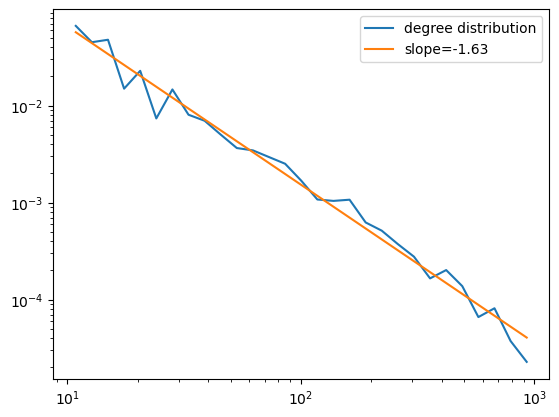

In [87]:
max_degree = G_airtraffic.maxdegree()
# hist, bin = np.histogram(G_airtraffic.vs.degree(), bins=np.arange(0.5, max_degree+0.5, 1), density=True)
hist, bin = np.histogram(G_airtraffic.vs.degree(), bins=np.logspace(1, 3, 30), density=True)

bin_center = (bin[1:] + bin[:-1]) / 2
par = np.polyfit(np.log(bin_center), np.log(hist), 1)
print(par)
plt.plot(bin_center, hist, label='degree distribution')
plt.plot(bin_center, np.exp(par[1])* bin_center**par[0], label=f'slope={par[0]:.2f}')
plt.legend()
plt.xscale('log')
plt.yscale('log')

In [88]:
# find node id of an airport:
G_airtraffic.vs.find(name='TLV')

igraph.Vertex(<igraph.Graph object at 0x000001FE1230F540>, 2839, {'name': 'TLV'})

In [89]:
G_airtraffic.transitivity_local_undirected()[2839]

0.4037650113599481

In [90]:
G_airtraffic.vs.find(name='TLV').betweenness()

38251.46416052108

In [91]:
G_airtraffic.vs.find(name='TLV').degree()

271

In [92]:
# shortest path from Tel Aviv to Hawaii
G_airtraffic.get_shortest_paths(
    G_airtraffic.vs.find(name='TLV'),
    to=G_airtraffic.vs.find(name='HNL'),
)

[[2839, 835, 1111]]

In [14]:
G_airtraffic.vs[835]

igraph.Vertex(<igraph.Graph object at 0x000001FE10968040>, 835, {'name': 'EWR'})

In [59]:
# airport with maximum degree
G_airtraffic.vs.select(_degree=G_airtraffic.maxdegree())['name']

['ATL']

In [60]:
# airport with maximum betweenness
G_airtraffic.vs.select(_betweenness=max(G_airtraffic.betweenness()))['name']

['LAX']

## Exercises

1. Calculate the fractional dimension of dragon fractal numerically

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

@njit
def rotate_curve(x, y, center_x, center_y):
    x, y = x - center_x, y - center_y
    return - y + center_x, x + center_y

@njit
def iterate_dragon(x, y):
    new_x, new_y = rotate_curve(x, y, x[-1], y[-1])
    new_x = np.concatenate((x[:-1], new_x[::-1]))
    new_y = np.concatenate((y[:-1], new_y[::-1]))
    return new_x, new_y
    
@njit
def dragon_fractal(n, x=np.array([1., 0.]), y=np.array([0., 0.])):
    for i in range(n):
        x, y = iterate_dragon(x, y)
    return x, y

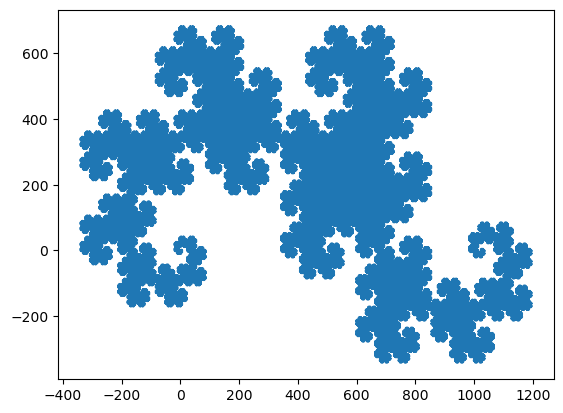

In [94]:
x, y = dragon_fractal(20)
plt.plot(x, y)

2. Reproduce the figure in Duncan J. Watts and Steven Strogatz's nature paper

![nature_figure](https://www.researchgate.net/profile/Olaf-Sporns/publication/50268221/figure/fig2/AS:203034706616323@1425418654961/The-Watts-Strogatz-model-of-the-small-world-The-network-at-the-upper-left-hand-corner.png)

The real world network has much smaller distance than regular network and much larger clustering coefficient than random network. Watts-Strogatz Model is a network model between regular and random network. Study how the average distance and the average clustering coefficient changes with the increasing of rewiring parameter p.


> For reproduce the figure. I recommend you use a WS small world network with at least 1000 node, and repeat the generation 100 times to calculate the mean average distance and the mean clustering coefficient

10it [02:21, 14.17s/it]


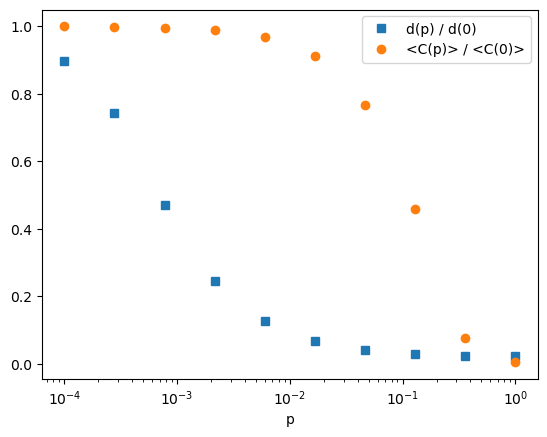

3. Write a function to generate Watts-Strogatz Model without using the generator build inside igraph.

In [41]:
import igraph as ig

def my_Watts_Strogatz(n, k, p):
    """
    n: number of vertices
    
    k: Each node is joined with its k nearest neighbors in a ring topology.
    
    p: The probability of rewiring each edge
    
    return an igraph Graph object
    """
    # Hit: you can create an ajacency matrix that describes a ring topology
    # then rewiring the edges with probability p (apply it on the ajacency matrix)
    # then create an igraph Graph object from the ajacency matrix
    
    raise NotImplementedError


In [ ]:
# For checking your result
G = my_Watts_Strogatz(100, 2, 0.05) 
layout = ig.Graph.layout_circle(G)
ig.plot(G, bbox=(400, 400), vertex_size=3, layout=layout)